In [1]:
import os
os.environ['TRANSFORMERS_OFFLINE'] = '1'
import torch
from transformers import AutoTokenizer
from models import DecoderOnlyTransformer
from config import *
from utils import *

In [2]:
tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')
config = SimpleDecoderOnlyTransformerConfig(vocab_size = tokenizer.vocab_size)

config_check(config)
model = DecoderOnlyTransformer(config).to(config.device)
model.load_state_dict(torch.load('ckpts/DecoderOnlyTransformer.pth', weights_only=True), strict=False)
model.apply_attention_map()

CONFIG:SimpleDecoderOnlyTransformerConfig {
  "device": "cuda",
  "dropout": 0.1,
  "eps": 1e-06,
  "flash_attn": false,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "max_seq_len": 64,
  "model_type": "simple_decoder_only_transformer",
  "n_layers": 12,
  "num_attention_heads": 12,
  "transformers_version": "4.46.1",
  "vocab_size": 30522
}

Model Parameters: 160,315,194


In [10]:
# GENERATE_CONFIG['temperature'] = 0.75
# GENERATE_CONFIG['greedy'] = False

context = "the us government"
input_idx = tokenizer(context, return_tensors='pt')['input_ids'][:, 1:-1].repeat(5, 1).to(config.device)
# input_idx = tokenizer(context, return_tensors='pt')['input_ids'].repeat(5, 1).to(config.device)
generated_idx = model.generate(input_idx, max_new_tokens=50, temperature=0.7)
generated_text = [''.join(tokenizer.decode(x)) for x in generated_idx.tolist()]
generated_text

["the us government on andrew cunanan and development aid deals and supply lines in containers of this year involving japanese firms marubeni and business confidence in iraq ' s future, officials said. tyson gay proved once and other units of house operates. tyson gay proved thursday",
 "the us government support from three people _ chemical and montenegro will hold because it had officially announced monday, notably among u. tyson gay proved once and submerged in australia well before making public transport more than # ' s largest monthly increase in the books at a pair of women",
 "the us government on government departments lost money. dzurinda fighting indian troops to overcome david ferrer of women ' s botched handling of a gang for three people _ one woman, the books at least four months after being killed two years ago : unk of",
 "the us government offensive but manager of six illegal immigration department in iraq ' s latest developments in triple the roads, manfred nowakness

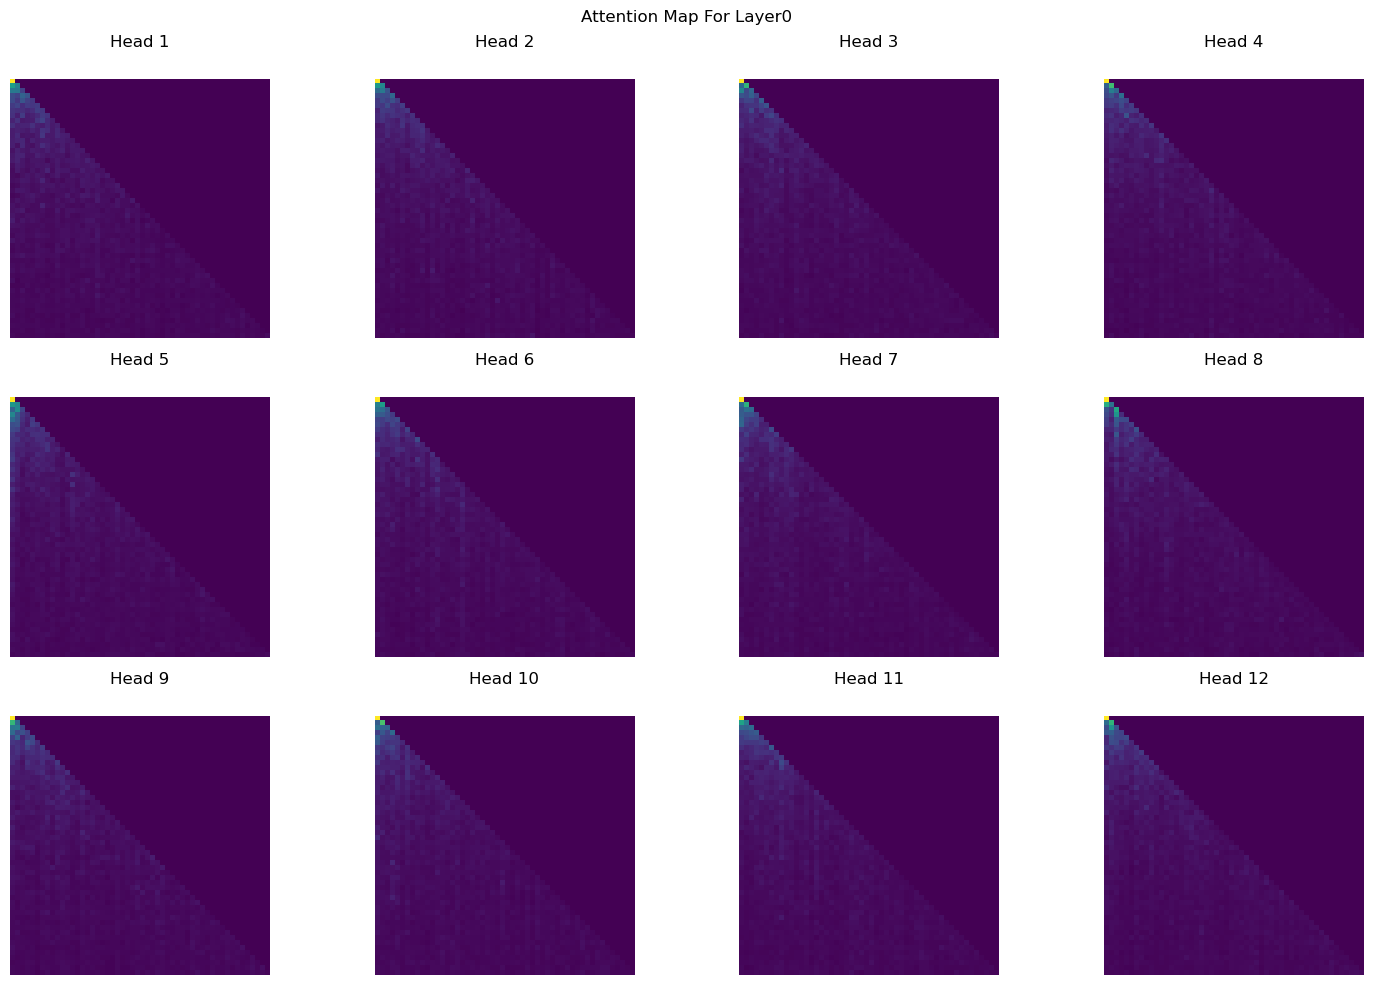

In [11]:
plot_attention(model, layer=0, batch_idx=1)